In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [23]:
# read in csv & display first 5 rows
sleepData = pd.read_csv("sleep_health_lifestyle.csv")
sleepData.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [25]:
# display data info
sleepData.info()
# seems to have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [27]:
# General Statistical Overview
# There is a total of 374 entries (count is always 37, which the 'count' row was removed)
# Rounded to the nearest tenth
sleepData.describe().drop(index='count').round(1)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
mean,187.5,42.2,7.1,7.3,59.2,5.4,70.2,6816.8
std,108.1,8.7,0.8,1.2,20.8,1.8,4.1,1617.9
min,1.0,27.0,5.8,4.0,30.0,3.0,65.0,3000.0
25%,94.2,35.2,6.4,6.0,45.0,4.0,68.0,5600.0
50%,187.5,43.0,7.2,7.0,60.0,5.0,70.0,7000.0
75%,280.8,50.0,7.8,8.0,75.0,7.0,72.0,8000.0
max,374.0,59.0,8.5,9.0,90.0,8.0,86.0,10000.0


In [29]:
# General Statistical Overview Part 2
# including string values
sleepData.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [31]:
# Occupation vs. Different Lifestyle Habits
occupationVsLifestyle = sleepData.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Physical Activity Level': 'mean',
    'Stress Level': 'mean'
}).round(2)

display(occupationVsLifestyle)

,Sleep Duration,Physical Activity Level,Stress Level
Occupation,,,
Accountant,7.11,58.11,4.59
Doctor,6.97,55.35,6.73
Engineer,7.99,51.86,3.89
Lawyer,7.41,70.43,5.06
Manager,6.90,55.00,5.00
Nurse,7.06,78.59,5.55
Sales Representative,5.90,30.00,8.00
Salesperson,6.40,45.00,7.00
Scientist,6.00,41.00,7.00


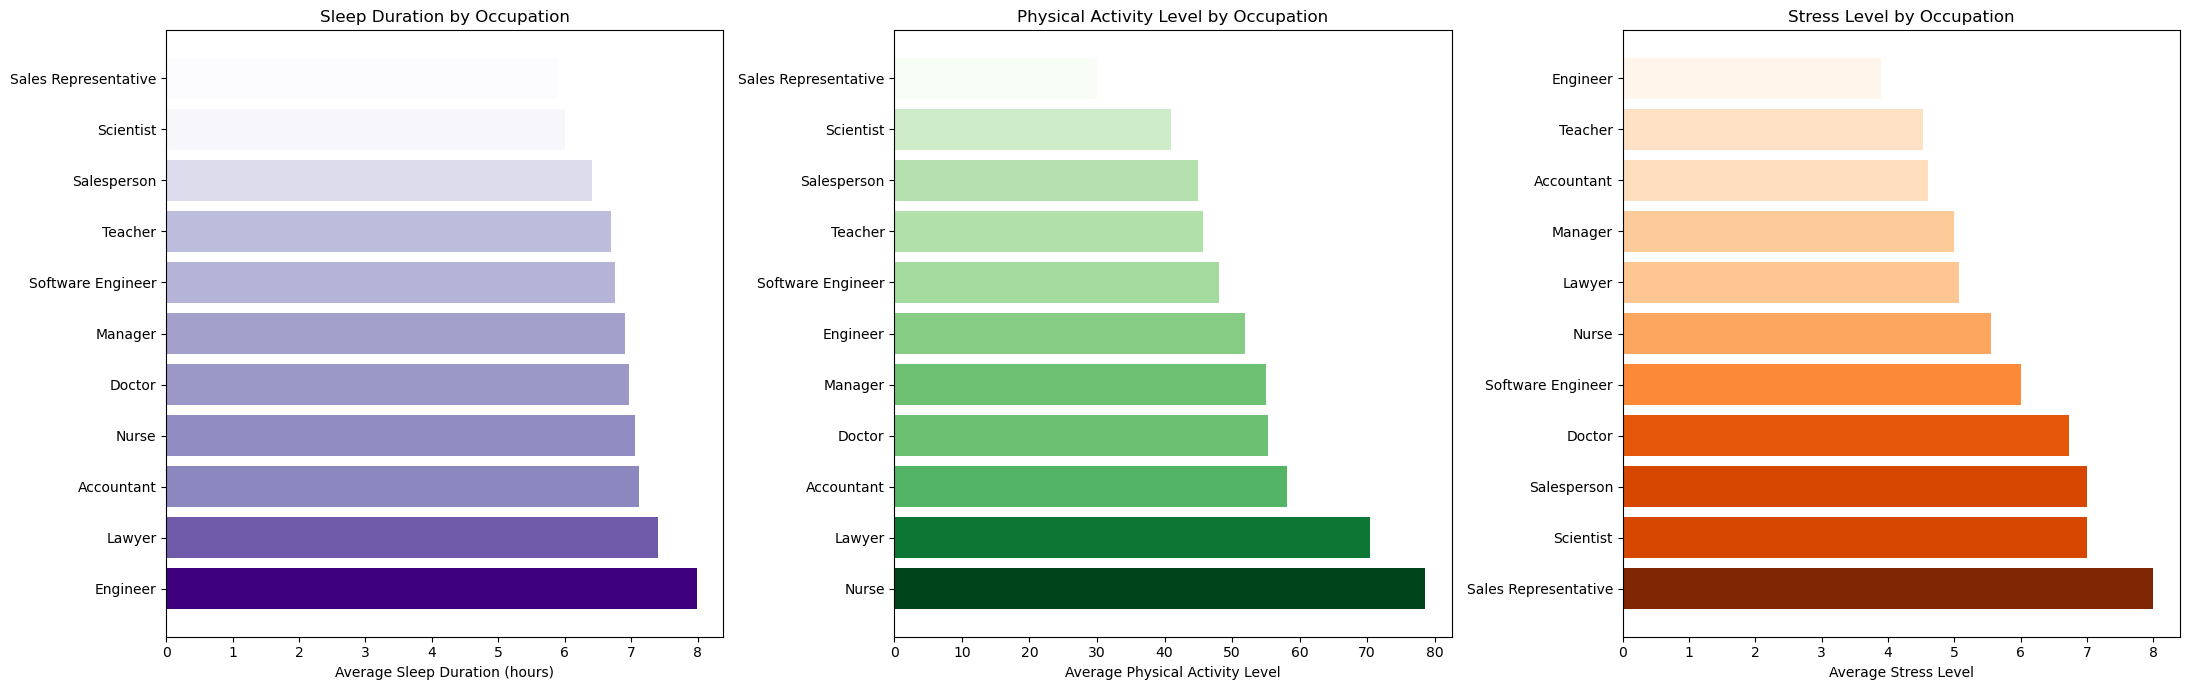

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Sleep Duration
sleep_avg = sleepData.groupby('Occupation')['Sleep Duration'].mean().sort_values()
norm_sleep = plt.Normalize(sleep_avg.min(), sleep_avg.max())
colors_sleep = [cm.Purples(norm_sleep(v)) for v in sleep_avg.values]

axes[0].barh(sleep_avg.index, sleep_avg.values, color=colors_sleep)
axes[0].set_title('Sleep Duration by Occupation')
axes[0].set_xlabel('Average Sleep Duration (hours)')
axes[0].invert_yaxis()

# Physical Activity Level
activity_avg = sleepData.groupby('Occupation')['Physical Activity Level'].mean().sort_values()
norm_activity = plt.Normalize(activity_avg.min(), activity_avg.max())
colors_activity = [cm.Greens(norm_activity(v)) for v in activity_avg.values]

axes[1].barh(activity_avg.index, activity_avg.values, color=colors_activity)
axes[1].set_title('Physical Activity Level by Occupation')
axes[1].set_xlabel('Average Physical Activity Level')
axes[1].invert_yaxis()

# Stress Level
stress_avg = sleepData.groupby('Occupation')['Stress Level'].mean().sort_values()
norm_stress = plt.Normalize(stress_avg.min(), stress_avg.max())
colors_stress = [cm.Oranges(norm_stress(v)) for v in stress_avg.values]

axes[2].barh(stress_avg.index, stress_avg.values, color=colors_stress)
axes[2].set_title('Stress Level by Occupation')
axes[2].set_xlabel('Average Stress Level')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

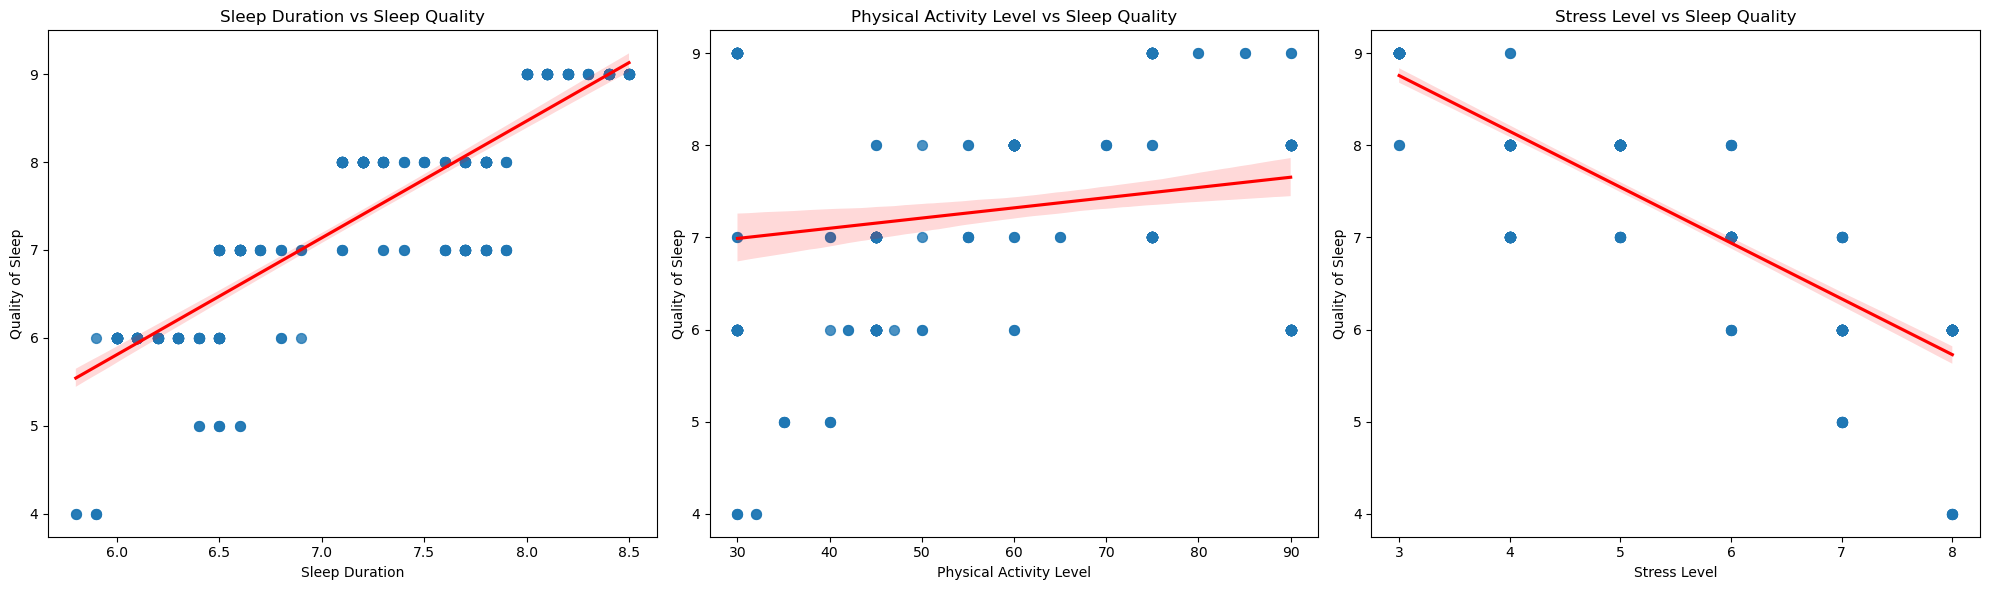

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Sleep Duration
sns.regplot(ax=axes[0], x='Sleep Duration', y='Quality of Sleep', data=sleepData, scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[0].set_title('Sleep Duration vs Sleep Quality')

# Physical Activity Level
sns.regplot(ax=axes[1], x='Physical Activity Level', y='Quality of Sleep', data=sleepData, scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[1].set_title('Physical Activity Level vs Sleep Quality')

# Stress Level
sns.regplot(ax=axes[2], x='Stress Level', y='Quality of Sleep', data=sleepData, scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[2].set_title('Stress Level vs Sleep Quality')

plt.tight_layout()
plt.show()

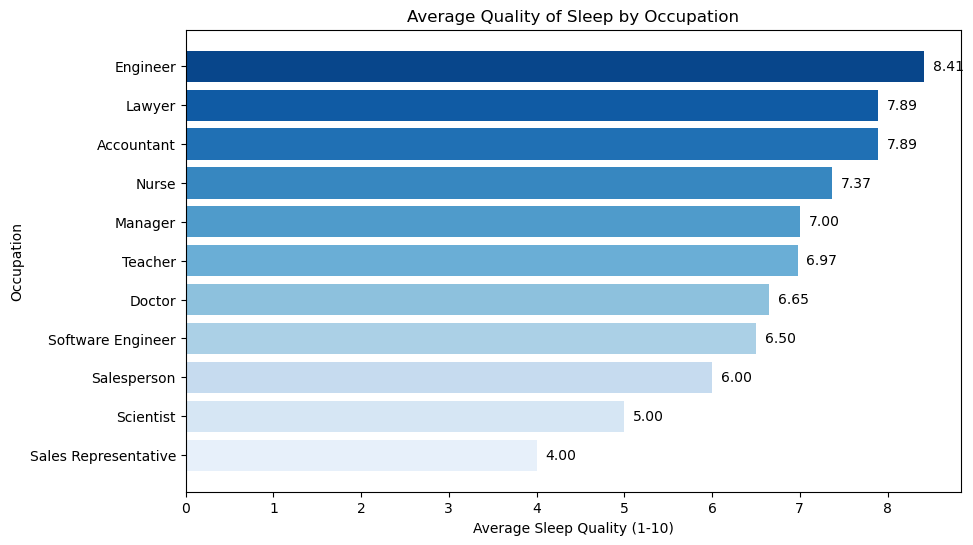

In [37]:
avg_sleep_quality = sleepData.groupby('Occupation')['Quality of Sleep'].mean().sort_values()

plt.figure(figsize=(10,6))
bars = plt.barh(avg_sleep_quality.index, avg_sleep_quality.values, color=sns.color_palette('Blues', len(avg_sleep_quality)))

plt.title('Average Quality of Sleep by Occupation')
plt.xlabel('Average Sleep Quality (1-10)')
plt.ylabel('Occupation')

# Add text labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.show()


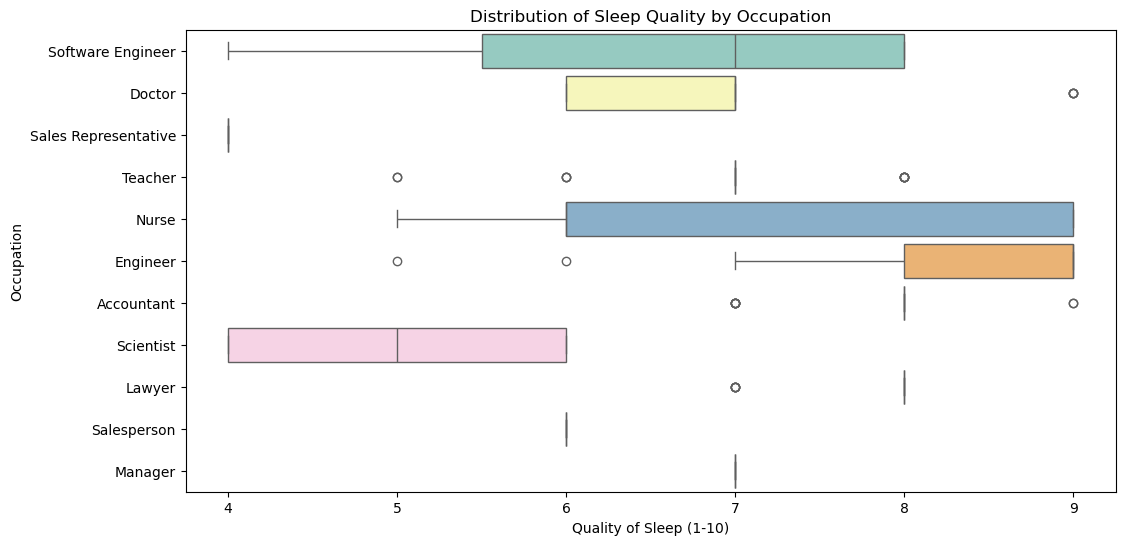

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Occupation', x='Quality of Sleep', data=sleepData, palette='Set3')
plt.title('Distribution of Sleep Quality by Occupation')
plt.xlabel('Quality of Sleep (1-10)')
plt.ylabel('Occupation')
plt.show()